# LINEAR REGRESSION WITH PYTHON

### This dataset gives you information about a bunch of houses in regions of the United States.

### The data contains the following columns:
. 'AVG AREA INCOME'
. 'AVG AREA HOUSE AGE'
. 'AVG AREA NUMBER OF ROOMS'
. 'AVG AREA NUMBER OF BEDROOMS'
. 'AREA POPULATION'
. 'PRICE'
. 'ADDRESS'

# Check out the data

In [546]:
usahousing = pd.read_csv("C:\\Users\\Kalpana\\Downloads\\USA_Housing.csv")

In [547]:
usahousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [548]:
usahousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [549]:
usahousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [550]:
usahousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

#LETS CREATE SOME SIMPLE PLOT TO CHECK OUT THE DATA

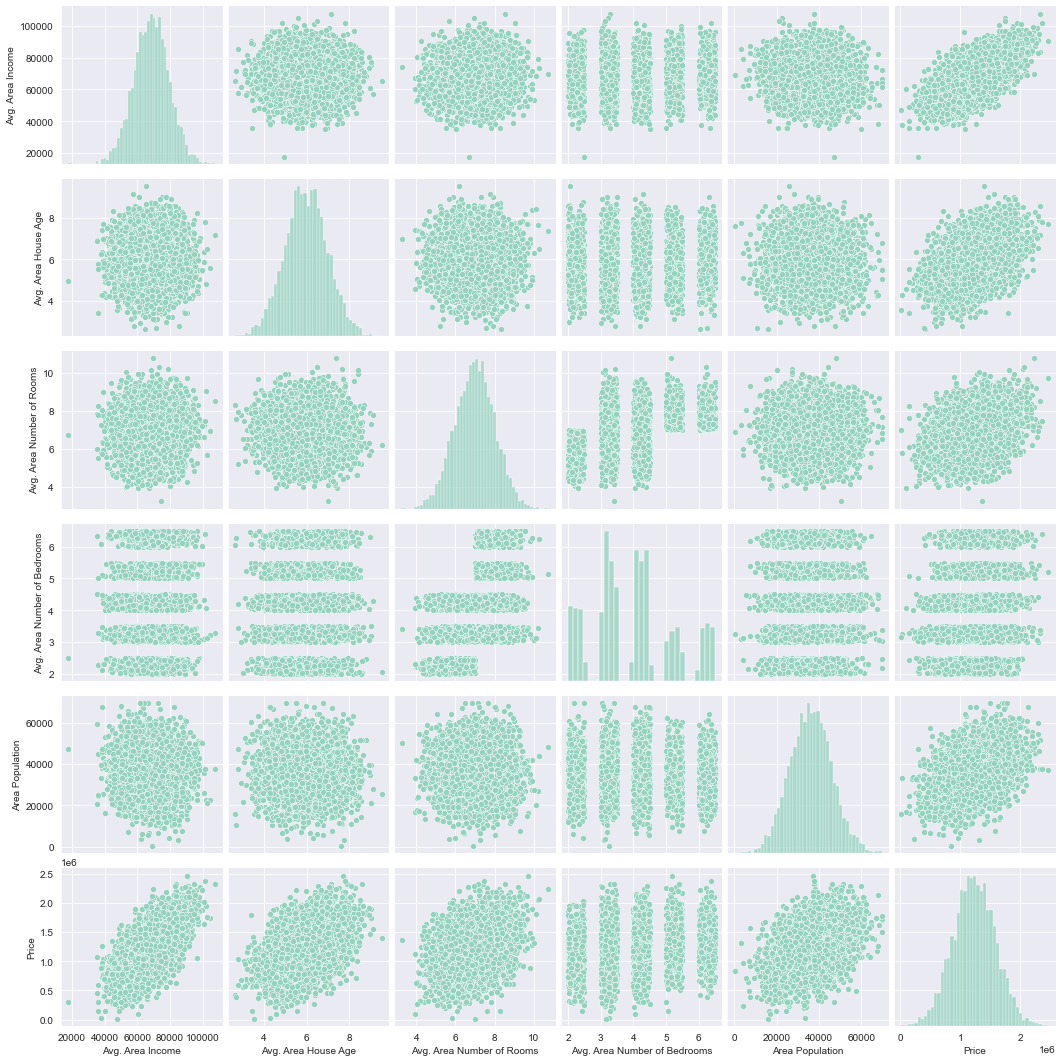

In [551]:
sns.pairplot(usahousing)

C:\Users\Kalpana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Price', ylabel='Density'>

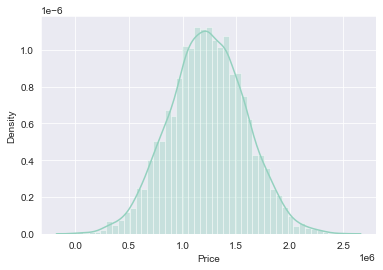

In [552]:
sns.distplot(usahousing['Price'])

<AxesSubplot:>

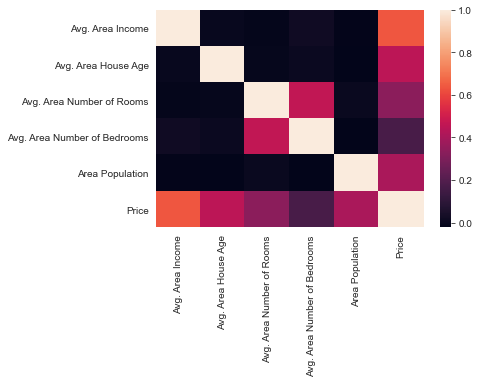

In [553]:
sns.heatmap(usahousing.corr())

# TRAINING A LINEAR REGRESSION MODEL

## X AND Y ARRAYS

In [566]:
x = usahousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = usahousing['Price']

# TRAIN TEST SPLIT

In [567]:
from sklearn.model_selection import train_test_split

In [568]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

# CREATING AND TRAINING THE MODEL

In [569]:
from sklearn.linear_model import LinearRegression

In [570]:
lm = LinearRegression()

In [571]:
lm.fit(x_train,y_train)

LinearRegression()

# MODEL EVALUATION

In [574]:
print(lm.intercept_)
print(lm.coef_)

-2640159.796851911
[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [578]:
df = pd.DataFrame(lm.coef_,x.columns,columns=['coefficient'])

In [579]:
df

,coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# PREDICTIONS FROM OUR MODEL

In [580]:
predictions = lm.predict(x_test)

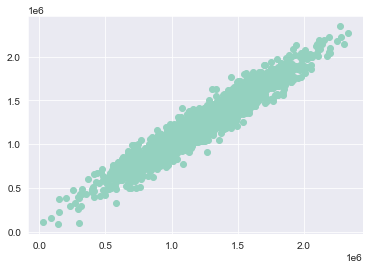

In [581]:
plt.scatter(y_test,predictions)

In [582]:
# RESIDUAL HISTOGRAM

C:\Users\Kalpana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Price', ylabel='Density'>

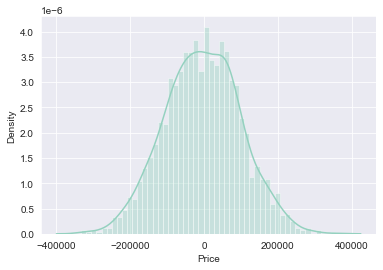

In [584]:
sns.distplot((y_test-predictions),bins=50)

# REGRESSION EVALUATION METRICS

In [586]:
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print(metrics.explained_variance_score(y_test,predictions))

82288.22251914957
10460958907.209501
102278.82922291153
0.9178179926151797
